# INFO BASICA

# LIBRERIAS

In [1]:
import warnings
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math
from statistics import mean 
from itertools import product
from sklearn.model_selection import TimeSeriesSplit

C:\Users\migue\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# opciones del notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

# LECTURA DE DATOS

In [3]:
# Leo los tipos de cambio de las divisas

monedas = pd.read_excel('./data/Series de precios.xlsx', sheet_name='Hoja1', 
                        usecols=['Date','EUR_USD','AUD_USD','EUR_DEPOSIT','AUD_DEPOSIT'])
monedas['Date'] = pd.to_datetime(monedas['Date'], format="%Y-%m-%d")
monedas = monedas.set_index('Date')
monedas = monedas.loc['2015-04-30':,:]

In [4]:
monedas.head(20)

,EUR_USD,AUD_USD,EUR_DEPOSIT,AUD_DEPOSIT
Date,,,,
2015-04-30,1.1224,0.7905,0.140,2.63
2015-05-01,1.1199,0.7851,0.135,2.56
2015-05-04,1.1146,0.7838,0.140,2.53
2015-05-05,1.1185,0.7942,0.125,2.60
2015-05-06,1.1347,0.7969,0.140,2.62
2015-05-07,1.1267,0.7907,0.135,2.62
2015-05-08,1.1199,0.7932,0.140,2.62
2015-05-11,1.1155,0.7891,0.140,2.62
2015-05-12,1.1213,0.7976,0.145,2.63


In [5]:
monedas['EUR_USD'].mean()

1.1285216494845334

In [12]:
monedas.tail(20)

,EUR_USD,AUD_USD,EUR_DEPOSIT,AUD_DEPOSIT
Date,,,,
2020-04-03,1.0801,0.5997,-0.2100,0.925
2020-04-06,1.0793,0.6088,-0.1700,0.990
2020-04-07,1.0892,0.6170,-0.1700,0.595
2020-04-08,1.0858,0.6230,-0.0650,0.925
2020-04-09,1.0930,0.6340,-0.1400,0.925
2020-04-13,1.0914,0.6382,-0.1400,1.000
2020-04-14,1.0980,0.6442,-0.0300,1.000
2020-04-15,1.0910,0.6319,-0.1400,0.795
2020-04-16,1.0840,0.6327,-0.1400,0.455


In [13]:
# Genero las señales // Euro -> 1 Libra -> -1

monedas['Señal'] = np.where(monedas.EUR_DEPOSIT > monedas.AUD_DEPOSIT, 1, -1)

In [14]:
# Visualizo una muestra

monedas.head(10)

,EUR_USD,AUD_USD,EUR_DEPOSIT,AUD_DEPOSIT,Señal
Date,,,,,
2015-04-30,1.1224,0.7905,0.140,2.63,-1
2015-05-01,1.1199,0.7851,0.135,2.56,-1
2015-05-04,1.1146,0.7838,0.140,2.53,-1
2015-05-05,1.1185,0.7942,0.125,2.60,-1
2015-05-06,1.1347,0.7969,0.140,2.62,-1
2015-05-07,1.1267,0.7907,0.135,2.62,-1
2015-05-08,1.1199,0.7932,0.140,2.62,-1
2015-05-11,1.1155,0.7891,0.140,2.62,-1
2015-05-12,1.1213,0.7976,0.145,2.63,-1


In [15]:
# Ahora el carry

monedas['Carry'] = 100

for i in range(1,len(monedas)):
    
    if monedas.Señal.iloc[i] == 1:
        
        monedas.Carry.iloc[i] = monedas.Carry.iloc[i-1]*(1+((monedas.EUR_DEPOSIT.iloc[i]-monedas.AUD_DEPOSIT.iloc[i])/100)*(1/365))
        
    else:
        
        monedas.Carry.iloc[i] = monedas.Carry.iloc[i-1]*(1+((monedas.AUD_DEPOSIT.iloc[i]-monedas.EUR_DEPOSIT.iloc[i])/100)*(1/365))

In [16]:
# Visualizo una muestra

monedas.head(20)

,EUR_USD,AUD_USD,EUR_DEPOSIT,AUD_DEPOSIT,Señal,Carry
Date,,,,,,
2015-04-30,1.1224,0.7905,0.140,2.63,-1,100.000000
2015-05-01,1.1199,0.7851,0.135,2.56,-1,100.006644
2015-05-04,1.1146,0.7838,0.140,2.53,-1,100.013192
2015-05-05,1.1185,0.7942,0.125,2.60,-1,100.019974
2015-05-06,1.1347,0.7969,0.140,2.62,-1,100.026770
2015-05-07,1.1267,0.7907,0.135,2.62,-1,100.033580
2015-05-08,1.1199,0.7932,0.140,2.62,-1,100.040377
2015-05-11,1.1155,0.7891,0.140,2.62,-1,100.047174
2015-05-12,1.1213,0.7976,0.145,2.63,-1,100.053985


In [17]:
# Calculo el carry total

monedas['Carry Total']  = 0

for i in range(1,len(monedas)):
    
    monedas['Carry Total'].iloc[i] = monedas.Carry.iloc[i] - monedas.Carry.iloc[i-1]

In [18]:
# Visualizo una muestra

monedas.head(20)

,EUR_USD,AUD_USD,EUR_DEPOSIT,AUD_DEPOSIT,Señal,Carry,Carry Total
Date,,,,,,,
2015-04-30,1.1224,0.7905,0.140,2.63,-1,100.000000,0.000000
2015-05-01,1.1199,0.7851,0.135,2.56,-1,100.006644,0.006644
2015-05-04,1.1146,0.7838,0.140,2.53,-1,100.013192,0.006548
2015-05-05,1.1185,0.7942,0.125,2.60,-1,100.019974,0.006782
2015-05-06,1.1347,0.7969,0.140,2.62,-1,100.026770,0.006796
2015-05-07,1.1267,0.7907,0.135,2.62,-1,100.033580,0.006810
2015-05-08,1.1199,0.7932,0.140,2.62,-1,100.040377,0.006797
2015-05-11,1.1155,0.7891,0.140,2.62,-1,100.047174,0.006797
2015-05-12,1.1213,0.7976,0.145,2.63,-1,100.053985,0.006811


In [19]:
# Genero los retornos del Euro

monedas['Retorno EUR_USD'] = 100

for i in range(1,len(monedas)):
    
    if monedas.Señal.iloc[i] == 1:
        
        monedas['Retorno EUR_USD'].iloc[i] = monedas['Retorno EUR_USD'].iloc[i-1]*(1+(monedas.EUR_USD.iloc[i]/monedas.EUR_USD.iloc[i-1]-1))
        
    else:
        
        monedas['Retorno EUR_USD'].iloc[i] = monedas['Retorno EUR_USD'].iloc[i-1]*(1-(monedas.EUR_USD.iloc[i]/monedas.EUR_USD.iloc[i-1]-1))

In [20]:
# Genero los retornos de la Libra

monedas['Retorno AUD_USD'] = 100

for i in range(1,len(monedas)):
    
    if monedas.Señal.iloc[i] == -1:
        
        monedas['Retorno AUD_USD'].iloc[i] = monedas['Retorno AUD_USD'].iloc[i-1]*(1+(monedas.AUD_USD.iloc[i]/monedas.AUD_USD.iloc[i-1]-1))
        
    else:
        
        monedas['Retorno AUD_USD'].iloc[i] = monedas['Retorno AUD_USD'].iloc[i-1]*(1-(monedas.AUD_USD.iloc[i]/monedas.AUD_USD.iloc[i-1]-1))

In [21]:
# Visualizo una muestra

monedas.head(20)

,EUR_USD,AUD_USD,EUR_DEPOSIT,AUD_DEPOSIT,Señal,Carry,Carry Total,Retorno EUR_USD,Retorno AUD_USD
Date,,,,,,,,,
2015-04-30,1.1224,0.7905,0.140,2.63,-1,100.000000,0.000000,100.000000,100.000000
2015-05-01,1.1199,0.7851,0.135,2.56,-1,100.006644,0.006644,100.222737,99.316888
2015-05-04,1.1146,0.7838,0.140,2.53,-1,100.013192,0.006548,100.697048,99.152435
2015-05-05,1.1185,0.7942,0.125,2.60,-1,100.019974,0.006782,100.344707,100.468058
2015-05-06,1.1347,0.7969,0.140,2.62,-1,100.026770,0.006796,98.891346,100.809614
2015-05-07,1.1267,0.7907,0.135,2.62,-1,100.033580,0.006810,99.588562,100.025300
2015-05-08,1.1199,0.7932,0.140,2.62,-1,100.040377,0.006797,100.189611,100.341556
2015-05-11,1.1155,0.7891,0.140,2.62,-1,100.047174,0.006797,100.583249,99.822897
2015-05-12,1.1213,0.7976,0.145,2.63,-1,100.053985,0.006811,100.060270,100.898166


In [22]:
# Separo en un nuevo dataframe para calcular los acumulados

Resultados = monedas.loc[:,['Carry Total', 'Retorno EUR_USD','Retorno AUD_USD']]

In [23]:
# Total divisa = (Retorno EUR - Retorno EUR anterior) + (Retorno GBP - Retorno GBP anterior)

Resultados['Total divisa'] = 0

for i in range(1,len(monedas)):
    
    Resultados['Total divisa'].iloc[i] = (Resultados['Retorno EUR_USD'].iloc[i] - Resultados['Retorno EUR_USD'].iloc[i-1]) + (Resultados['Retorno AUD_USD'].iloc[i] - Resultados['Retorno AUD_USD'].iloc[i-1])

In [24]:
# Visualizo una muestra

Resultados.head(20)

,Carry Total,Retorno EUR_USD,Retorno AUD_USD,Total divisa
Date,,,,
2015-04-30,0.000000,100.000000,100.000000,0.000000
2015-05-01,0.006644,100.222737,99.316888,-0.460375
2015-05-04,0.006548,100.697048,99.152435,0.309858
2015-05-05,0.006782,100.344707,100.468058,0.963283
2015-05-06,0.006796,98.891346,100.809614,-1.111805
2015-05-07,0.006810,99.588562,100.025300,-0.087098
2015-05-08,0.006797,100.189611,100.341556,0.917305
2015-05-11,0.006797,100.583249,99.822897,-0.125022
2015-05-12,0.006811,100.060270,100.898166,0.552290


In [25]:
# Total Profit & Loss = Total divisa + Carry Total

Resultados['P&L'] = Resultados['Total divisa'] + Resultados['Carry Total']

In [26]:
# Visualizo una muestra

Resultados.head(20)

,Carry Total,Retorno EUR_USD,Retorno AUD_USD,Total divisa,P&L
Date,,,,,
2015-04-30,0.000000,100.000000,100.000000,0.000000,0.000000
2015-05-01,0.006644,100.222737,99.316888,-0.460375,-0.453731
2015-05-04,0.006548,100.697048,99.152435,0.309858,0.316406
2015-05-05,0.006782,100.344707,100.468058,0.963283,0.970064
2015-05-06,0.006796,98.891346,100.809614,-1.111805,-1.105009
2015-05-07,0.006810,99.588562,100.025300,-0.087098,-0.080288
2015-05-08,0.006797,100.189611,100.341556,0.917305,0.924102
2015-05-11,0.006797,100.583249,99.822897,-0.125022,-0.118225
2015-05-12,0.006811,100.060270,100.898166,0.552290,0.559101


In [27]:
# Total acumulado = Acumulado anterior + P&L

Resultados['Acumulado'] = 0

for i in range(1, len(Resultados)):
    
    Resultados['Acumulado'].iloc[i] = Resultados['Acumulado'].iloc[i-1] + Resultados['P&L'].iloc[i]

In [28]:
# Visualizo una muestra

Resultados.head(20)

,Carry Total,Retorno EUR_USD,Retorno AUD_USD,Total divisa,P&L,Acumulado
Date,,,,,,
2015-04-30,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000
2015-05-01,0.006644,100.222737,99.316888,-0.460375,-0.453731,-0.453731
2015-05-04,0.006548,100.697048,99.152435,0.309858,0.316406,-0.137325
2015-05-05,0.006782,100.344707,100.468058,0.963283,0.970064,0.832739
2015-05-06,0.006796,98.891346,100.809614,-1.111805,-1.105009,-0.272270
2015-05-07,0.006810,99.588562,100.025300,-0.087098,-0.080288,-0.352558
2015-05-08,0.006797,100.189611,100.341556,0.917305,0.924102,0.571544
2015-05-11,0.006797,100.583249,99.822897,-0.125022,-0.118225,0.453319
2015-05-12,0.006811,100.060270,100.898166,0.552290,0.559101,1.012421


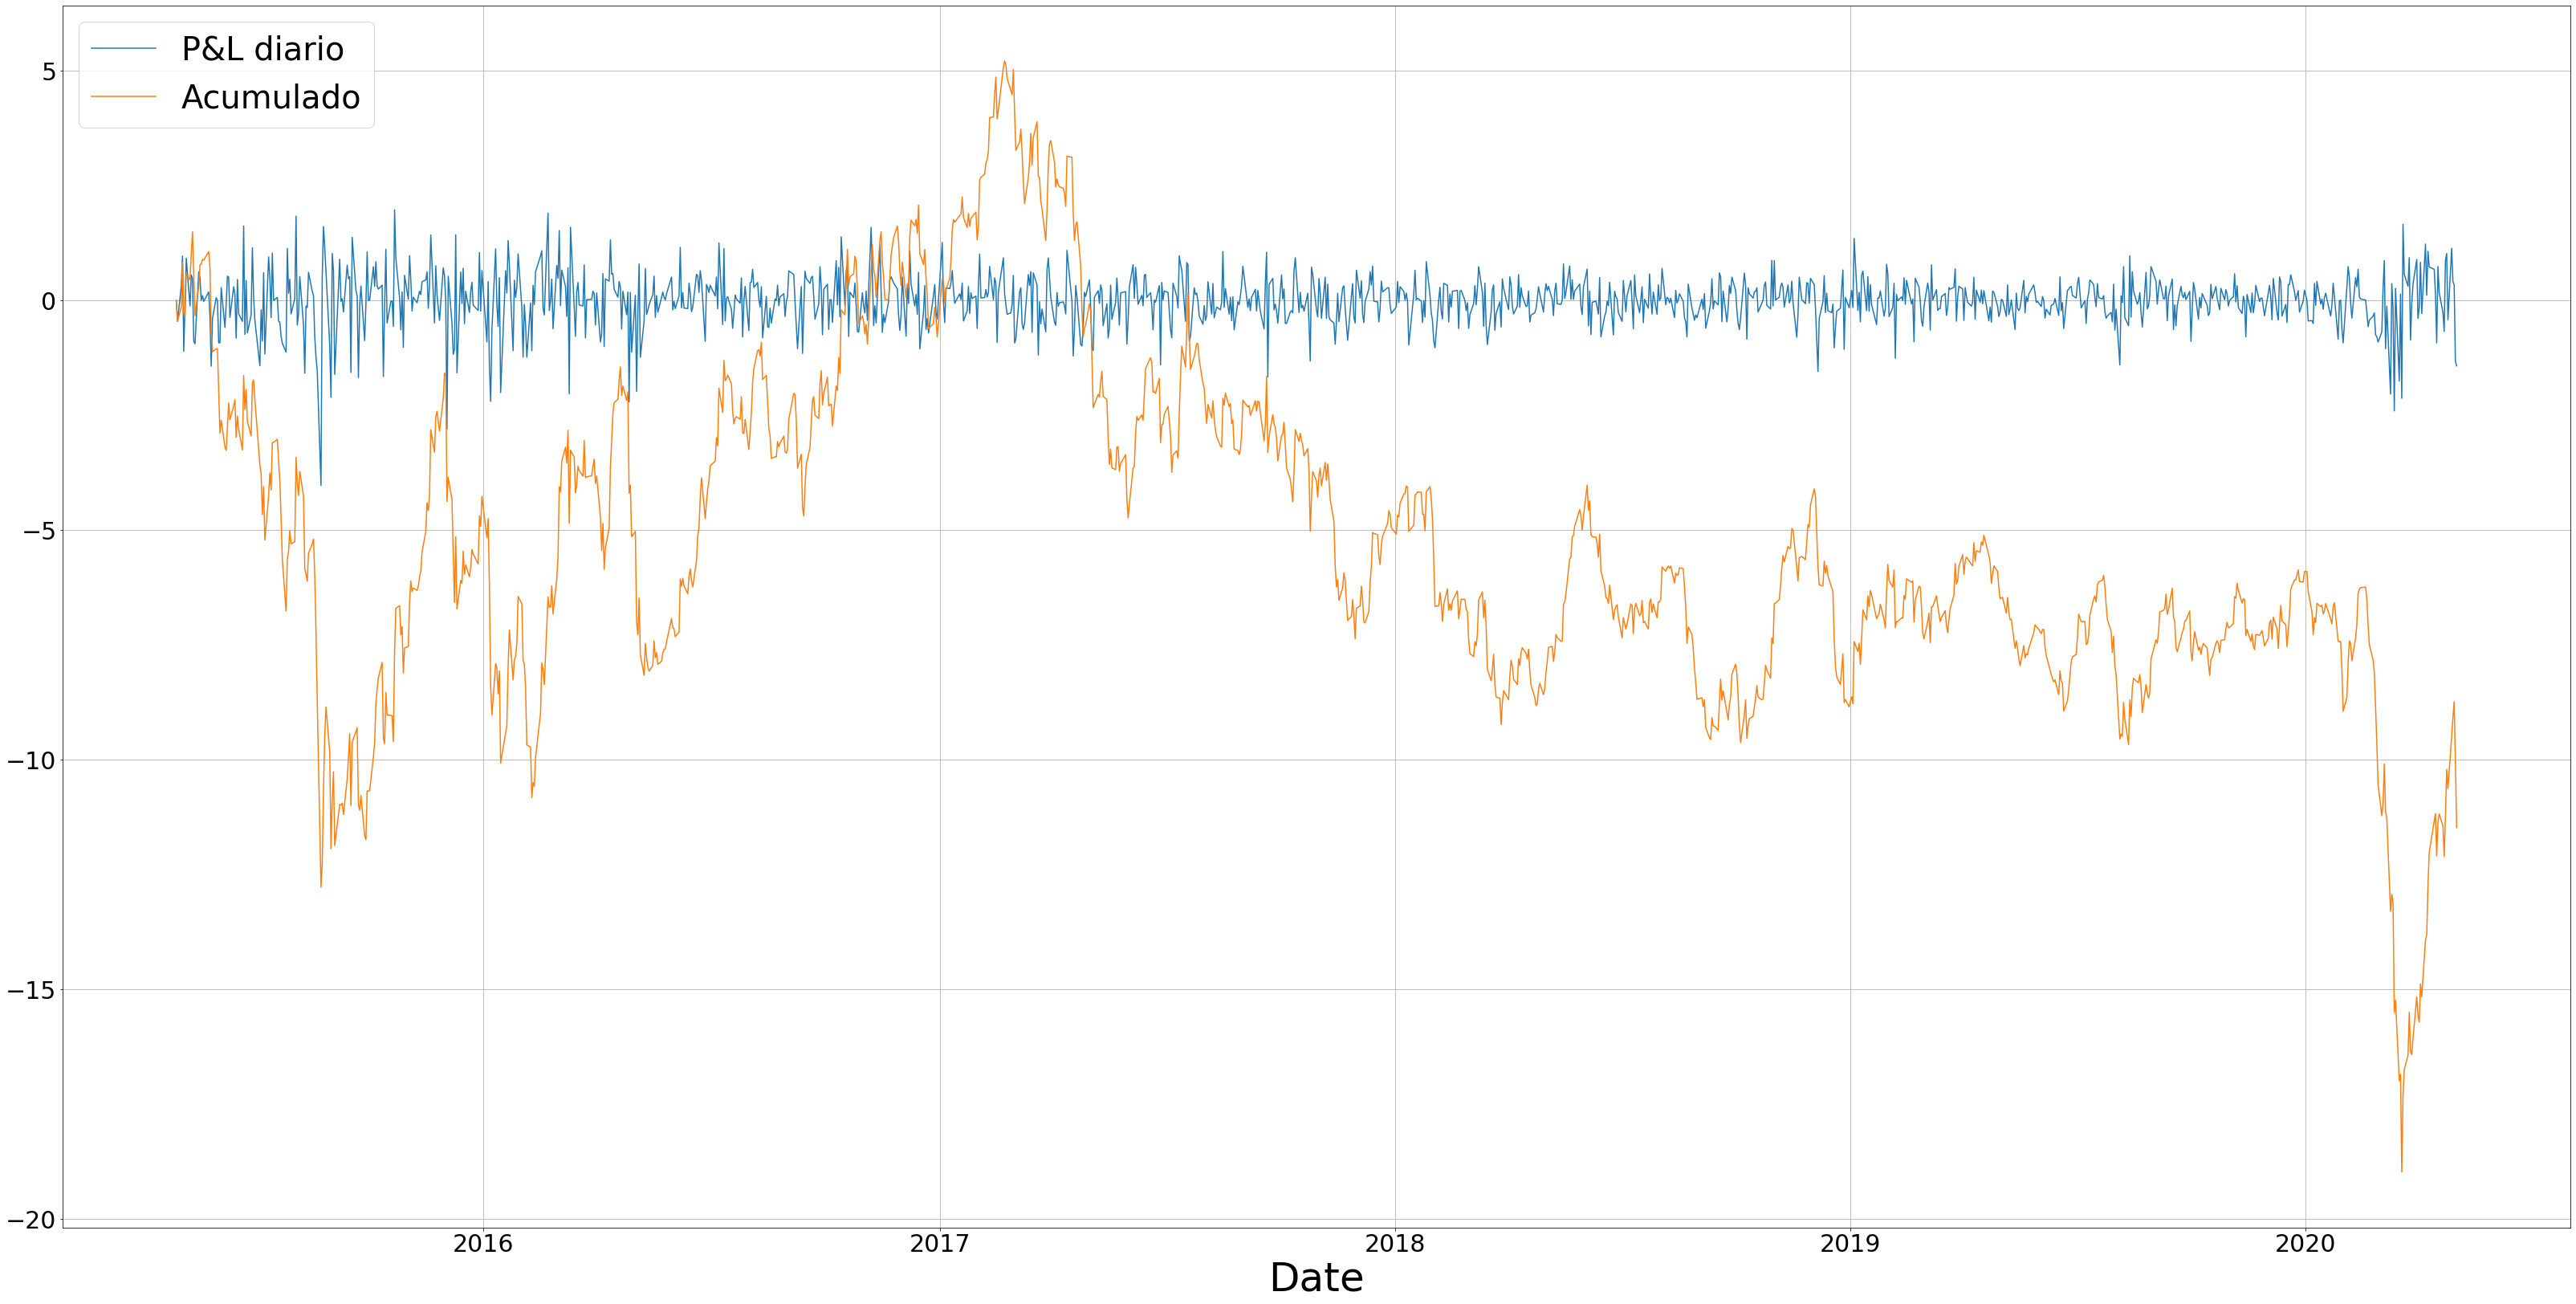

In [29]:
# Grafico la evolucion de las estrategias

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(Resultados["P&L"])
ax1 = plt.plot(Resultados["Acumulado"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["P&L diario", "Acumulado"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [30]:
carry_euro = pd.DataFrame(Resultados.loc[:, 'Retorno EUR_USD'])
carry_euro.columns = ['Carry Euro']
carry_euro

,Carry Euro
Date,
2015-04-30,100.000000
2015-05-01,100.222737
2015-05-04,100.697048
2015-05-05,100.344707
2015-05-06,98.891346
2015-05-07,99.588562
2015-05-08,100.189611
2015-05-11,100.583249
2015-05-12,100.060270


In [31]:
carry_euro.to_csv('./data_resultante/divisa.csv')